<a href="https://colab.research.google.com/github/SayyedAliT/CA4/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2:**


*   Question 1:

* نقاط پرت : نقاط پرت نقاطی هستند که مقادیر آن‌ها بسیار متفاوت از بقیه داده‌ها هستند. در مدل‌های رگرسیون، یک نقطه پرت می‌تواند یک داده با مقدار بسیار بالا یا پایین باشد که با بقیه داده‌ها همخوانی ندارد. نقاط پرت می‌توانند به دلیل خطاهای اندازه‌گیری، خطاهای ورودی داده یا توزیع غیرعادی داده‌ها وجود داشته باشند. نقاط پرت می‌توانند تاثیر زیادی بر برازش مدل رگرسیون داشته باشند و باعث بروز خطا در تخمین پارامترهای مدل شوند1
*   نقاط اهرمی : نقاط اهرمی نقاطی هستند که مقادیر متغیر توضیحی آن‌ها بسیار متفاوت از بقیه داده‌ها هستند. این نقاط می‌توانند تاثیر زیادی بر شیب خط رگرسیون داشته باشند. یک نقطه با اهرم بالا می‌تواند باعث شود خط رگرسیون به سمت آن کشیده شود.

* نقاط با هر دو ویژگی: بعضی نقاط ممکن است هم نقطه پرت باشند و هم نقطه اهرمی. این نقاط می‌توانند تاثیر بسیار زیادی بر مدل رگرسیون داشته باشند و باعث تغییرات قابل توجه در پارامترهای مدل شوند



* **Part 2:**
  * ضریب تعیین: گاهی از «ضریب تعیین» (Coefficient of Determination) برای نمایش درصدی از تغییرات که توسط مدل رگرسیونی بیان شده، استفاده می‌شود. ضریب تعیین را با علامت R**2
 نشان می‌دهند. هر چه ضریب تعیین بزرگتر باشد، نشان‌دهنده موفقیت مدل در پیش‌بینی متغیر وابسته است. در رگرسیون خطی ساده مربع ضریب همبستگی خطی همان ضریب تعیین خواهد بود.
 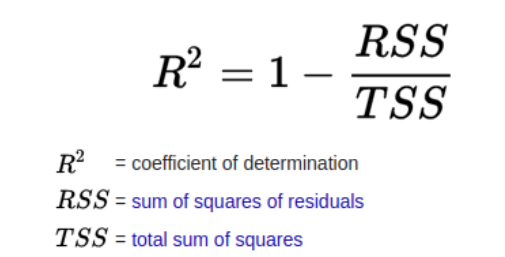

**Part 3:**
نتیجه رگرسیون به صورت زیر است:
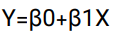

برای محاسبه بتا - و بتایک هم میتوان به صورت دستی به جلو رفت و هم میتوان با استفاده از اینترنت به روش محاسبه این دو پارامتر  پی برد.
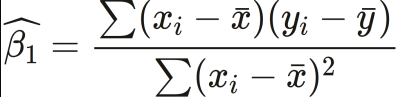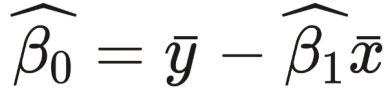

در برنامه زیر ابتدا نقاط را تعریف میکنیم و سپس تابعی برای محاسبه پارامترهای مدل رگرسیون تعریف میکنیم.
سپس تابعی برای محاسبه مربع R تعریف خواهیم کرد.
نتیجه رگرسیون ها به صورت زیر خواهد بود.


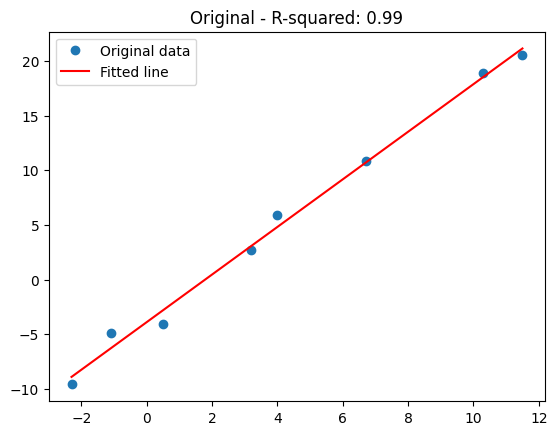

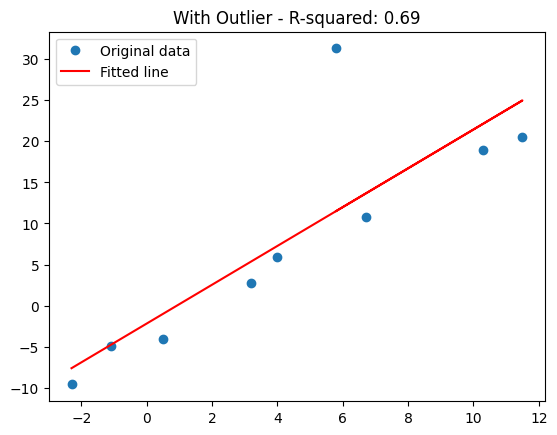

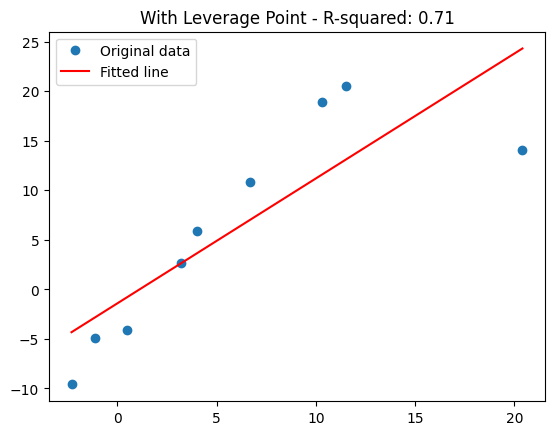

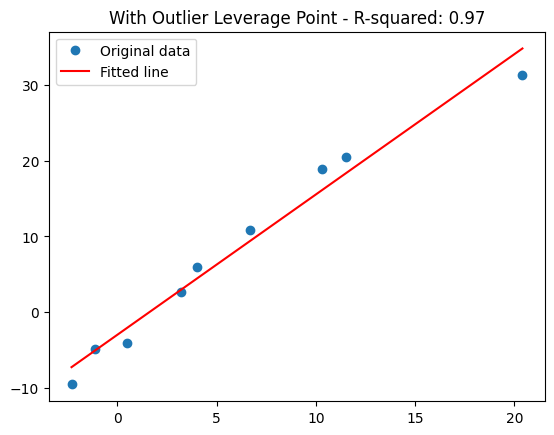

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([-2.3, -1.1, 0.5, 3.2, 4.0, 6.7, 10.3, 11.5])
y = np.array([-9.6, -4.9, -4.1, 2.7, 5.9, 10.8, 18.9, 20.5])
outlier_x = 5.8
outlier_y = 31.3
leverage_x = 20.4
leverage_y = 14.1
outlier_leverage_x = 20.4
outlier_leverage_y = 31.3

def linear_regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

def r_squared(y, y_pred):
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

datasets = [(x, y, 'Original'),
            (np.append(x, outlier_x), np.append(y, outlier_y), 'With Outlier'),
            (np.append(x, leverage_x), np.append(y, leverage_y), 'With Leverage Point'),
            (np.append(x, outlier_leverage_x), np.append(y, outlier_leverage_y), 'With Outlier Leverage Point')]

for x, y, label in datasets:
    m, c = linear_regression(x, y)
    y_pred = m * x + c
    r2 = r_squared(y, y_pred)

    plt.figure()
    plt.plot(x, y, 'o', label='Original data')
    plt.plot(x, y_pred, 'r', label='Fitted line')
    plt.title(f'{label} - R-squared: {r2:.2f}')
    plt.legend()
    plt.show()


**Part 4:**

برای بهتر شدن نتیجه میتوان از چندین راه استفاده کرد:

1.   راه اول وزن داده به داده ها است. به این صورت که هر داده ای نزدیک تر به خط رگرسیون باشد دارای تاثیر بیشتری میباشد و نقاط پرت دارای وزن کمی هستند به صورتی که گویی تاثیر آنها در محاسبات را بسیار کم میکنیم.

2.   گاهی میتوان از تبدیل داده برای بهبود نتیجه استفاده کرد، البته این روش بسیار وابسته به نوع داده های ما هستند. مثلا از لگاریتم داده ها یا رادیکال آنها استفاده کنیم به صورتی که فاصله نقاط را از یکدیگر کم کنیم.

3.   میتوانیم از روش گرادیان کاهشی برای حل این مسئله استفاده کنیم.

4.   البته از روش DBSCAN نیز میتوانیم استفاده کنیم که از روش خوشه بندی برای داده ها استفاده میکند.


